# Zadanie projektu


# http://web.tuke.sk/fei-cit/wikt2017/challenge.html

# Explorativna analyza


## Ciel prezentacie:
zrozumitelne vysvetlit a kategorizovat rozne techniky explorativnej analyzy dat podla toho, ake data spracovavame.

### Povieme si o:
* Metrikach na zobrazenie roznych vlastnosti atributov
* Vizualizacii dat a o tom ako ich interpretovat
* Prejdeme si zopar statistickych testov na to aby sme zistili ci su v datach nejake vzory alebo ci existuju vyznamne rozdiely medzi vzorkami

# Struktura prezentacie

## Analyza po jednom (Univariate analysis)
* Spojite atributy
* Kategoricke atributy

## Analyza po paroch atributov (Bivariate analysis)
* Spojite - Spojite
* Kategoricke - Spojite
* Kategoricke - Kategoricke

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn
from sklearn import linear_model as lm

In [2]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 6)
from IPython.display import Image, SVG, display

# Analyza po jednom (Univariate analysis)

Zobrazenie vlastnosti jedneho atributu

## Spojite atributy

Chceme zobrazit aky je tvar rozdelenia dat, ci sa zoskupuju okolo nejakeho **centra**, aka je **rozptylenost** hodnot

### Zobrazenie centralnosti:
* mean (priemer)
* median (median, stredna hodnota, prostredna hodnota, centralna hodnota): hodnota, ktora rozdeluje vyssie a nizsie hodnoty
* mode (Modus, modálna hodnota, najpravdepodobnejšia hodnota): najcastejsia hodnota (hodnota s najvacsou pravdepodobnostou vyskytu)

![Comparison mean median mode](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Comparison_mean_median_mode.svg/512px-Comparison_mean_median_mode.svg.png)

### Rozptylenost

* range (rozsah): max - min
* quartile (kvartil): hodnota, od ktorej je 25% resp 75% hodnot vacsich 
* percentile (percentil): hodnota, od ktorej je XX% hodnot vacsich
* inter quartile range (medzikvartilove rozpätie): rozdiel medzi 25% a 75% kvartilom, menej nachylne na outlierov ako rozsah
![boxplot](img/outlier_box_plot.gif)

* variance (variancia): priemerna kvadraticka odchylka od priemeru 
$$ E[(X-E[X])^2] $$
* standard deviation (standardna odchylka): druha odmocnina variancie, je v jednotkach meranej premennej
* skewness (vychylenost?): metrika symetrickosti rozdelenia, ci je rozdelenie navazene na jednu stranu 
* kurtosis (spicatost): ake mnozstvo dat je vo chvoste rozdelenia
   
(zdroj obrazku: https://taps-graph-review.wikispaces.com/Box+and+Whisker+Plots)   

# Skewness a Kurtosis

## Skewness

Skewness je metrika toho, ako je rozdelenie symetricke. Uplne symetricke rozdelenie ma hodnotu skewness rovnu 0. V podstate to porovnava relativnu velkost dvoch chvostov rozdelenia. 
Rozdelenie naklonene do lava bude mat skewness vacsiu ako 0, naklonene doprava bude mat menej ako 0.

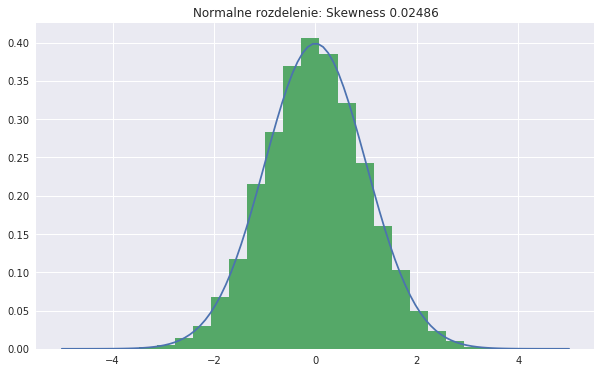

In [3]:
sample_size = 10000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

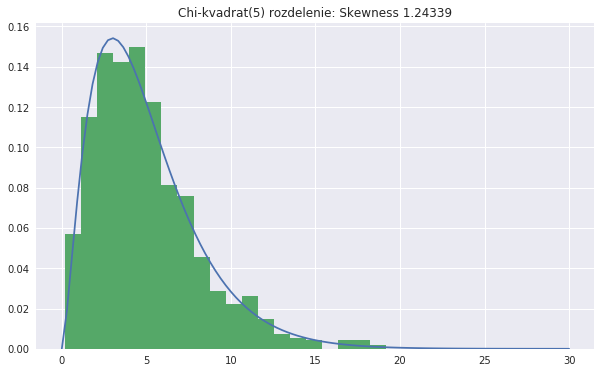

In [4]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

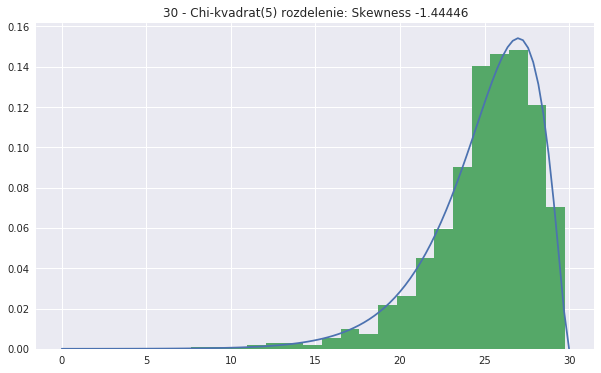

In [5]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = 30 - chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(30 - x))
plt.hist(sample, normed=True, bins=20)
plt.title("30 - Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

## Kurtosis

Kurtosis hovori aka je kombinovana velkost chvostov. Meria mnozstvo dat sustredene v chvostoch. 
Velmi casto sa porovnava k hodnote kurtosis normalneho rozdelenia, ktora je 3. 
Ak je to viac ako 3, tak viac dat je sustredenych na okrajoch. Ak menej ako 3, tak je menej dat v okrajoch.

Casto sa pouziva aj excess kurtosis, co je rozdiel oproti normalnemu rozdeleniu, cize kurtosis - 3. 

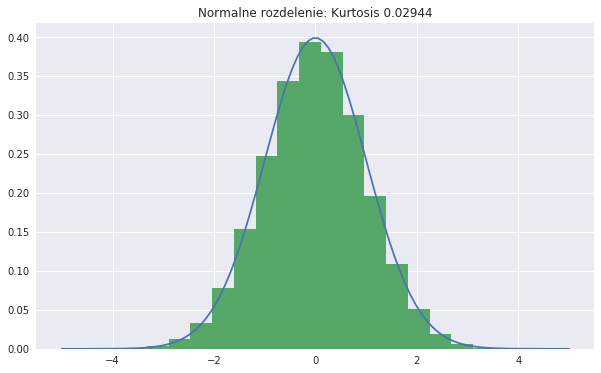

In [6]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample), ))

Ocakavali sme, ze dostaneme hodnotu kurtosis okolo 3. V skutocnosti funkcia stats.kurtosis pocita pri predvolenych nastaveniach excess kurtosis

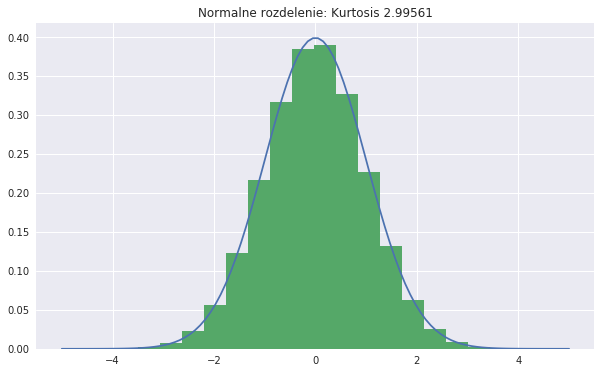

In [7]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))
# musime prestavit parameter fisher na False

A teraz ukazka na nejakych rozdeleniach, kde vieme pekne kontrolovat mnozstvo dat v chvoste. Naprikl lognormal

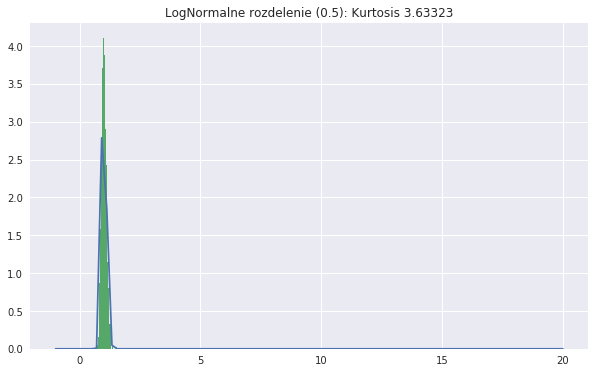

In [8]:
sample_size = 1000

lognorm = stats.lognorm(0.1)
x = np.linspace(-1, 20, 100)
sample = lognorm.rvs(sample_size)

plt.plot(x, lognorm.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("LogNormalne rozdelenie (0.5): ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))

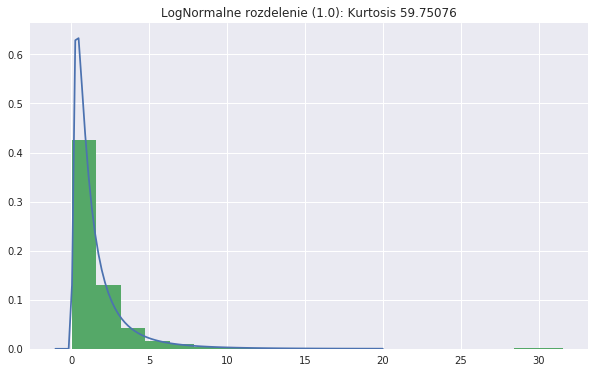

In [9]:
sample_size = 1000

lognorm = stats.lognorm(1)
x = np.linspace(-1, 20, 100)
sample = lognorm.rvs(sample_size)

plt.plot(x, lognorm.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("LogNormalne rozdelenie (1.0): ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))

### A teraz viacero rozdeleni v jednom obrazku aby sa to dalo dobre predstavit

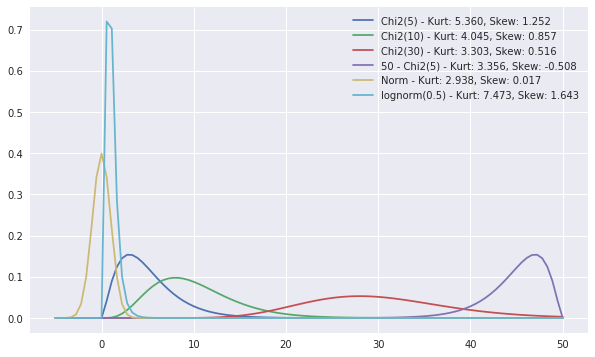

In [10]:
sample_size = 10000
x = np.linspace(-5, 50, 100)

dists = [
    ("Chi2(5)", stats.chi2(5).pdf(x), stats.chi2(5).rvs(sample_size)),
    ("Chi2(10)", stats.chi2(10).pdf(x), stats.chi2(10).rvs(sample_size)),
    ("Chi2(30)", stats.chi2(30).pdf(x), stats.chi2(30).rvs(sample_size)),
    ("50 - Chi2(5)", stats.chi2(5).pdf(50 - x), 50 - stats.chi2(30).rvs(sample_size)),
    ("Norm", stats.norm(0, 1).pdf(x), stats.norm(0, 1).rvs(sample_size)),
    ("lognorm(0.5)", stats.lognorm(0.5).pdf(x), stats.lognorm(0.5).rvs(sample_size))
]

labels = []

for name, dist, sample in dists:
    plt.plot(x, dist)
    labels.append("%s - Kurt: %.3f, Skew: %.3f" % (name, stats.kurtosis(sample, fisher=False), stats.skew(sample)))
    
plt.legend(labels)

## Analyza po jednom - spojite atributy - vizualizacia

Ako ste uz urcite pochopili, tak primarne sposoby vizualizacie su histogram a box plot

In [11]:
sample_size = 100000

norm = stats.norm(0, 1)

x = np.linspace(-5, 5, 100)
sample = np.concatenate([
    stats.norm(0, 1).rvs(sample_size),
    stats.norm(2, 0.5).rvs(sample_size),
    ])

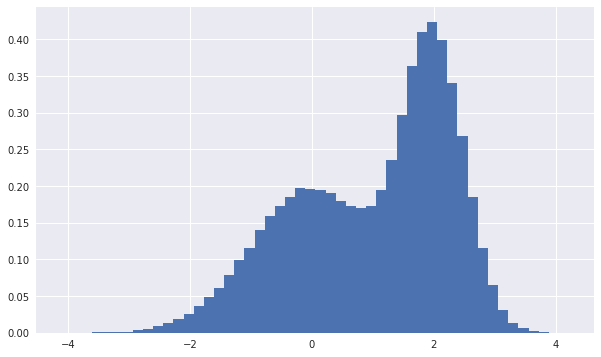

In [12]:
_ = plt.hist(sample, normed=True, bins=50)

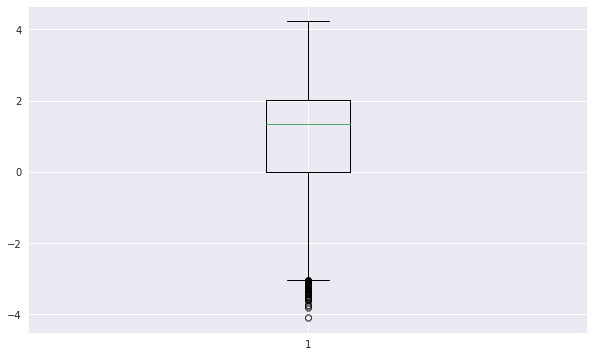

In [13]:
plt.rc("lines", markeredgewidth=0.5)
_ = plt.boxplot(sample)

Osobne mam celkom rad spojenie boxplotu a histogramu do Violinplotu pretoze prehladne ukazuje tvar rozdelenia.

Castejsie sa ale pouziva vykreslenie dvoch obrazkov (aj histogram a aj boxplot). Spolu obsahuju viac informacii ako len jeden violinplot

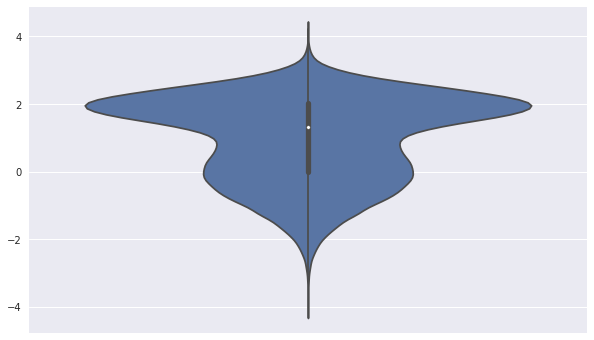

In [14]:
seaborn.violinplot(sample, orient='v')

### QQ-plot

In [15]:
import statsmodels.api as sm

In [16]:
sample_size = 1000

x = np.linspace(-5, 5, 100)
sample = stats.norm(0, 1).rvs(sample_size)
# sample = stats.norm(10, 5).rvs(sample_size)

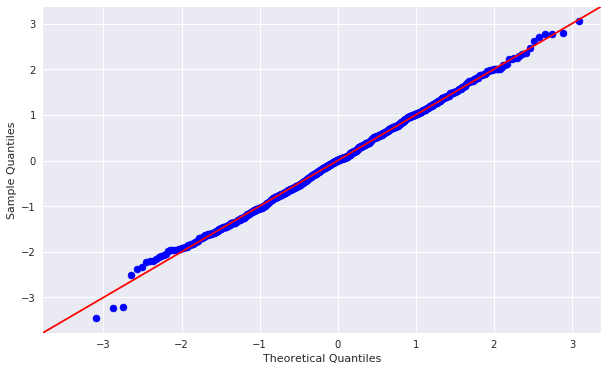

In [17]:
_ = sm.ProbPlot(sample, fit=True).qqplot(line='45')

QQ-plot je vizualna metoda na urcenie, ci dve datove sady pochadzaju z rovnakeho rozdelenia (probability plot porovnava datovu sadu s teoretickym rozdelenim).

Probability plot porovnava voci zvolenemu teoretickemu rozdeleniu. V tomto pripade normalnemu.

Porovnava kvantily rozdeleni.

Osy su v jednotkach porovnavanych datovych sad

Bod na obrazku zobrazuje hodnotu kvantilu v prvm a druhom porovnavanom datasete.

Ak su datasety rovnako velke, tak je to len vykreslenie usporiadanych datasetov pomocou scatterplotu. Ak je jeden mensi, tak sa ten pouzije na urcenie kvartilov a hodnoty z druheho (vacsieho) datasetu sa interpoluju

#### Na ake otazky vie odpovedat?

* Pochadzaju pozorovania z rovnakeho rozdelenia?
* Maju rozdelenia rovnaku skalu (priemer, standardnu odchylku)?
* Je tvar porovnavanych rozdeleni podobny (rovna ciara, bez ohladu na jej posunutie a sklon)? 
* Maju rozdelenia podobne vlastnosti skewness a kurtosis?

Pri zakladnom nastaveni porovnava s normalnym rozdelenim. Co nam velmi nepomoze v pripade, ak nase pozorovania su z uplne ineho rozdelenia. Len nam to povie, ze je to nejake ine rozdelenie.

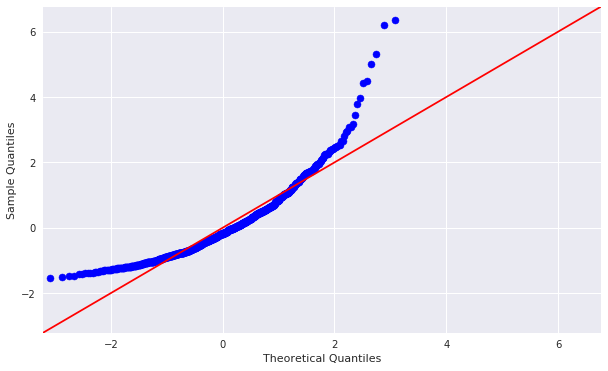

In [18]:
x = np.linspace(-5, 5, 100)
lognorm_sample = stats.lognorm(0.5).rvs(sample_size)
_ = sm.ProbPlot(lognorm_sample, fit=True).qqplot(line='45')

Ocividne je hovadina porovnavat tieto nase pozorovania s uplne inou distribuciou, ale moze sa to hodit, ked mame ine pozorovania

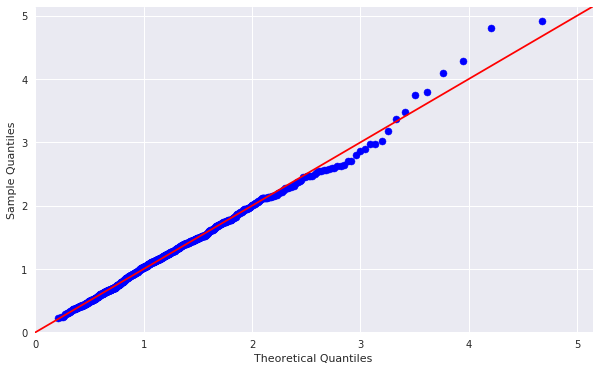

In [19]:
_ = sm.ProbPlot(lognorm_sample, dist=stats.lognorm, fit=True).qqplot(line='45')

Nastastie vieme zmenit teoreticke rozdelenie a mozeme sa porovnan s nim

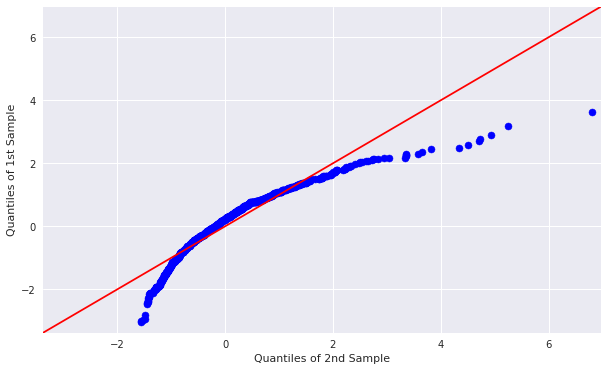

In [20]:
import statsmodels.api as sm
x = stats.norm(8.25, 2.75).rvs(1000)
y = stats.lognorm(0.5).rvs(1000)
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)
_ = pp_x.qqplot(line='45', other=pp_y)

#### Velmi pekny prispevok o tom ako interpretovat QQ-plot
https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

![QQ-plot](img/qq-plot.png)

## Analyza po jednom - kategoricke atributy

Tu je najcastejsim sposobom zobrazenia frekvencna tabulka zobrazujuca bud pocty pozorovani per unikatna hodnota atrinutu alebo pomer voci celkovemu poctu pozoorvani. 

Graficka vizualizacia je bar plot

In [21]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [23]:
diamonds.color.value_counts() / len(diamonds)

G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64

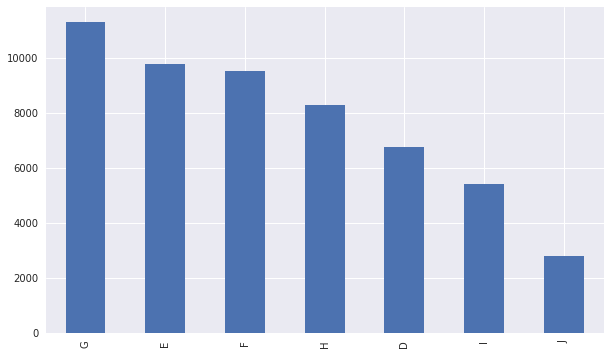

In [26]:
diamonds.color.value_counts().plot(kind='bar')

A samozrejme sa daju pouzit aj dalsie podobne typy na zobrazenie tychto istych dat. Napriklad kolacovy graf, aj ked ten sa cita trochu tazsie ako stlpcovy graf

Ak je atribut ordinalny, tak moze mat zmysel usporiadat hodnoty.

//asi nema zmysel usporiadavat farby, ale tie ich pomenovania ma k tomu nabadaju

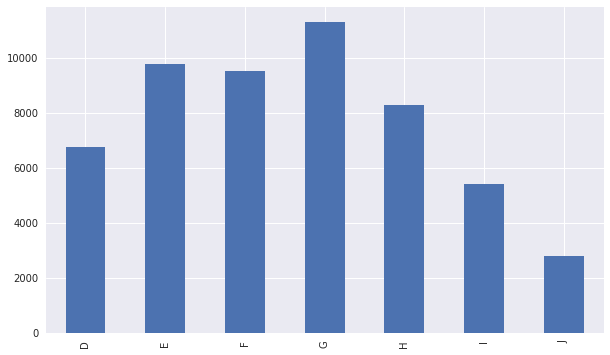

In [27]:
diamonds.color.value_counts()[['D', 'E', 'F', 'G', 'H', 'I', 'J']].plot(kind='bar')

Ked mam atribut, v ktyorom su nejake zavislosti (casova naslednost, ine poradie), tak moze mat zmysel zobrazit to pomocou ciaroveho grafu, ktory lepsie zobrazuje zmenu.

Pozor, pouzivat to len v pripade ak su tam zavislosti medzi hodnotami.

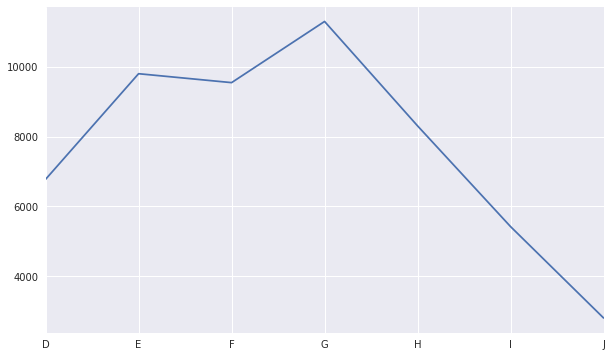

In [28]:
diamonds.color.value_counts()[['D', 'E', 'F', 'G', 'H', 'I', 'J']].plot(kind='line')

Najcastejsie sa tento graf pouziva pri casovych radoch.

Napriklad sa da pouzit na zobrazenie vyvoja nejakej meranej hodnoty v case. V tomto konkretnom pripade je to obsah NO2 vo vzduchu

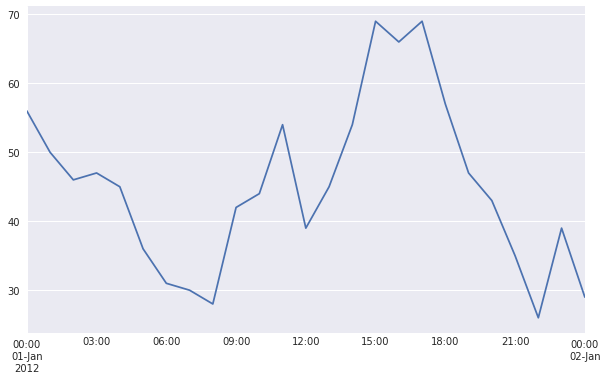

In [29]:
import airbase
no2 = airbase.load_data()

no2["2012-01-01 00:00": "2012-01-02 00:00"].FR04012.plot()

Obcas ma dokonca zmysel prekryvat viacere ciary cez seba, na to aby ste zobrazili viacero atributov / metrik / casovych obdobi ...

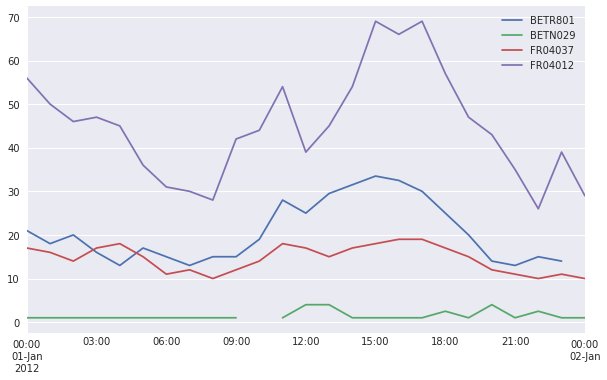

In [30]:
no2["2012-01-01 00:00": "2012-01-02 00:00"].plot()

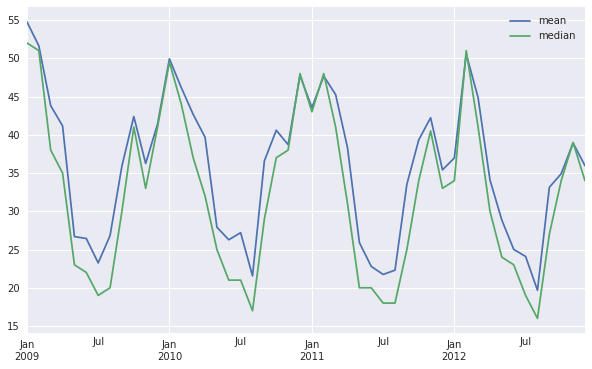

In [31]:
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()

# Analyza po paroch atributov (Bivariate analysis)

Analyza vztahov dvoch atributov. 

Kedze mame spojite a kategoricke atributy, tak mozu vzniknut 3 rozne kombinacie. Pre kazdu z nich existuju metody, ktore mozeme pouzit na opisanie ich vztahov a na ich vizualizaciu.

* Spojite - Spojite
* Kategoricke - Spojite
* Kategoricke - Kategoricke

# Spojity - Spojity

## Scatter plot
Najcastejsi sposob ako vizualizovat vztah dvoch spojitych atributov.
Zobrazuje rozmiestnenie v priestore hodnot. 

Da sa pouzit aj na vizualizovanie skupin pozorovani. Typicky na to aby sme zistili, ci su v datach nejake prirodzene zhluky

In [ ]:
iris = seaborn.load_dataset("iris")

plt.scatter(iris.sepal_length, iris.sepal_width)

Ak ide o oznackovane data, tak ich vieme ofarbit pomocou znacky a pozriet sa na to, ci sa daju na zaklade tychto atributov rozdelit do skupin.

In [ ]:
for name, group in iris.groupby("species"):
    plt.scatter(group.sepal_length, group.sepal_width, label=name)

plt.legend()

### Ak chcem vizualizovat vztah vsetkych kombinacii atributov, tak mozem spravit pairplot

Pozor, pri velkom pocte atributov je to dost necitatelne a velmi dlho sa to vytvara

In [ ]:
seaborn.pairplot(iris)

### Samozrejme sa da aj pairplot ofarbit triedou

In [ ]:
seaborn.pairplot(iris, hue="species")

ak by som chcel manualne vytvarat nejake pravidla na klasifikaciu, tak z tohto obrazku by som uz nejake vedel vyrobit

## Scatterplot sa da pouzit nie len na vizualizovanie zhlukov ale aj korelacii / zavislosti.

![scatter plot correlation](img/scatter-continuous-contunious.png)

Nedokaze vsak kvantifikovat silu vztahu. Na to potrebujeme nejaku inu metriku - korelaciu.

Zdroj obrazku: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one

# Korelacia

Hodnota v rozsahu [-1, 1], ktora hovori o tom, aky silny linearny vztah je medzi atributmi.

* -1 perfektna negativna korelacia
* 0 ziadna korelacia
* 1 perfektna kladna korelacia

Pearsnov korelacny koeaficient:
$$ corr(X, Y) = \frac{cov(X,Y)}{E[X]E[Y]} = \frac{E[(X-E[X])(Y-E[Y])]}{E[X]E[Y]}$$

In [ ]:
car_data = pd.read_csv('data/auto-mpg.data', delim_whitespace=True, 
                       names = ['mpg', 'cylinders', 'displacement','horsepower',
                                'weight', 'acceleration', 'model_year', 'origin', 'name'],
                        na_values='?'
                      )
car_data.head()

In [ ]:
car_data.describe()

In [ ]:
car_data = car_data.dropna()

In [ ]:
seaborn.regplot(x="horsepower", y="mpg", data=car_data)
print("Pearson correlation: %.3f" % car_data.horsepower.corr(car_data.mpg))

**Pozor** sklon regresnej ciary nehovori o sile korelacie. Len o smere.

In [ ]:
regr = lm.LinearRegression()
regr.fit(car_data.horsepower.values.reshape(len(car_data),1), car_data.mpg)

seaborn.regplot(x="horsepower", y="mpg", data=car_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (car_data.horsepower.corr(car_data.mpg), regr.coef_[0]))

Sklon regresnej krivky je uplne iny ako velkost korelacie. Len znamienko indikujuce smer je rovnake.

In [ ]:
x = np.arange(100)
y = np.ones(100)

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})

regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))


Toto je extremny pripad, kde korelaciu nevieme spocitat, kedze jedna hodnota je len konstanta (nulova variancia), pricom je to pekna rovna ciara so sklonom 0.

In [ ]:
x = np.arange(100)
y = x * (-3.14) + 3

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})
    
regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))

Tu je perfektne linearny vztah, kde je jasne vidiet, ze ten sklon je uplne iny.

In [ ]:
x = np.arange(100)
y = x + stats.norm(0,1).rvs(100)

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})

regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))

Aj ked pridame trochu sumu, tak je to velmi podobne

In [ ]:
x = np.arange(100)
y = x + stats.norm(0,30).rvs(100)

synth_data = pd.DataFrame({
    'x': x,
    'y': y
})

regr = lm.LinearRegression()
regr.fit(synth_data.x.values.reshape(100,1), synth_data.y)

seaborn.regplot(x="x", y="y", data=synth_data)
print("Pearson correlation: %.3f, Regresion coefficient: %.3f" % (synth_data.x.corr(synth_data.y), regr.coef_[0]))

Ked ale pridame toho sumu trochu viac, tak sa nam ta korelacia zacne poriadne kazit a znova vidime, ze to s tym smerom nesuvisi.

## Spat k datasetu o autach

### Ak by sme sa chceli pozriet na korelaciu medzi vsetkymi dvojicami atributov, tak sa da pouzit takato korelacna matica

In [ ]:
car_data.corr()

### A da sa aj vykreslit pomocou teplotnej mapy aby sa nam lepsie citala

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
seaborn.heatmap(car_data.corr(), ax=ax, annot=True, fmt=".3f")

# Kategoricky - Kategoricky

* Two-way table
* Heatmap
* Stacked bar plot
* Chi-kvadrat testy

In [ ]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

In [ ]:
# Frekvencna tabulka
titanic["Survived"].value_counts()

In [ ]:
survived_class = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"])
survived_class.index= ["died","survived"]
survived_class

In [ ]:
seaborn.heatmap(survived_class, annot=True, fmt="d")

### Ak by sme chceli zobrazit percentualny podiel, tak sa da normalizovat po riadkoch, stlpcoch, alebo vsetkych datach

In [ ]:
survived_class_perc = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"],
                            normalize='index') #'columns', 'all'
survived_class_perc.index= ["died","survived"]

seaborn.heatmap(survived_class_perc, annot=True, fmt=".4f")
survived_class_perc

### Daju sa tiez spravit aj tabulky s vyssimi dimenziami. Tam sa ale uz velmi rychlo straca prehladnost

In [ ]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], titanic["Sex"]],
            margins=True)


In [ ]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], titanic["Sex"], titanic["Embarked"]],
            margins=True)

# Stacked bar chart

In [ ]:
pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]).plot.bar(stacked=True)

# Chi-kvadrat (Chi-squared)

Tieto testy nie su zalozene na hodnotach atributov ako je to napriklad pri t-teste (kategoricka hodnota nema pre matematikov velky zmysel), ale na ich poctoch.

1. Chi-kvadrat test dobrej zhody (goodness-of-fit)
Testuje, ci rozlozenie hodnot kategorickej premennej zodpoveda ocakavanemu rozdeleniu.

2. Chi-kvadrat test nezavislosti
testuje, ci extistuje zavislost medzi dvoma kategorickymi premennymi 

zdroj prikladov: http://hamelg.blogspot.sk/2015/11/python-for-data-analysis-part-25-chi.html

## Chi-kvadrat test dobrej zhody

predstavte si, ze mame dve sady pozorovani a chceme urcit, ci su z rovnakeho rozdelenia.

Konkretny priklad: demograficke udaje pre cele USA a jeden stat v spojenych statoch

In [ ]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + 
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

In [ ]:
national_table = pd.crosstab(index=national[0], columns="count")
national_table

In [ ]:
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")
minnesota_table

Vzorec na vypocet chi-kvadrat statistiky
$$ \sum{\frac{(observerd - expected)^2}{expected}}$$

In [ ]:
observed = minnesota_table

national_ratios = national_table/len(national)  # pomery pre celu populaciu (referencne rozdelenie)
print('Ratios:', national_ratios)

expected = national_ratios * len(minnesota)   # ocakavane hodnoty ak by mala sledovana vzorka rovnake rozdelenie ako cela populacia
print("Expected:", expected) # ak su z rovnakeho rozdelenia, tak toto by malo byt velmi podobne ako obsah premennej minnesota_table

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print("Chi-squared", chi_squared_stat) # vysledna hodnota chi-kvadrat statistiky

Nameranu statistiku musime porovnat s kritickou hodnotou

In [ ]:
crit = stats.chi2.ppf(q = 0.95, # 95% confidence
                      df = 4)   # pocet stupnov volnosti testu = pocet kategorii - 1

print("Critical value:", crit) # kriticka hodnota by mala byt mensia ako hodnota chi-kvadrat statistiky, ktoru sme ziskali z dat

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # aka je p-hodnota nasho testu
                             df=4)
print("P value:", p_value)

Kriticka hodnota je mensia ako namerana hodnota statistiky na nasej vzorke a zaroven p-hodnota je mensia ako 0.01 na zvolenej hranici istoty, takze mozeme povedat ze pozorovania su z rovnakeho rozdelenia

**Pozor!**

ak by p-hodnota nebola mensia ako 0.01, tak by sme nemohli povedat, ze mame statisticky dokaz toho, ze data su z rozneho rozdelenia. Mozeme povedat len to, ze nemame dostatok dokazov na to aby sme zamietli nulovu hypotezu a teda ze nevieme zamietnut hypotezu, ze su z rozneho rozdelenia.



In [ ]:
# pre pohodlnost existuje pripravena funkcia, ktora to spocita za nas
# pozor na to, ze expected niesu namerane data pre celu populaciu ale ocakavane pocetnosti pri rovnakom pocte pozorovani ako ma 
# sledovana datova sada
stats.chisquare(f_obs= observed, f_exp=expected)

# Chi-kvadrat test nezavislosti

Testujeme, ci existuje zavislost medzi dvoma kategorickymi atributmi

In [ ]:
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)
voter_tab

In [ ]:
observed = voter_tab.ix[0:5,0:3] 
observed

In [ ]:
# Na zaklade sum po riadkoch a stlpcoch vyrobime ocakavane data
expected =  np.outer(voter_tab["All"][0:5],
                     voter_tab.ix["All"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat","independent","republican"]
expected.index = ["asian","black","hispanic","other","white"]

expected

toto vychadza z vety o sucine nezavislich premennych:

Ak A a B su nezavisle premenne take ze P(A) > 0 a P(B) > 0, tak
$$ P(A \cap B) = P(A) \times P(B)$$

expected obsahuje ocakavane pocetnosti v pripade ak by tato nezavislost platila. 

In [ ]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # pocet stupnov volnosti je sucin poctu kategorii pre kazdu premenny - 1. 
                                # Pocty su 3 a 5, teda 2 * 4 = 8

print("Critical value:", crit )

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value:", p_value)

In [ ]:
# znova, existuje predpripravena funkcia, ktorej stacia pozorovane pocetnosti a vrati nam 
# chi-kvadrat statistiku, p-hodnotu, pocet stupnov volnosti a ocakavane pocetnosti
stats.chi2_contingency(observed=observed)

Vysledok tohto testu je, ze namerana hodnota chi-kvadrat statistiky je mensia ako kriticka hodnota a nam sa nepodarilo doukazat zavislost medzi tymito dvoma premennymi.

Co dava celkom zmysel, kedze sme data generovali z dvoch uplne nezavislich nahodnych premennych.

Nepodaril osa nam teda vyvratit nulovu hypotezu a nemame dostatok dokazov na to, aby sme povedali, ze existuje zavislost medzi tymito dvoma premennymi

# Spojity - Kategoricky

Tu sa najcastejsie pouziva rozdelovanie podla kategorickej hodnoty a zobrazovanie rozdeleni podmnozin numerickych hodnot napriklad pomocou histogramov alebo box-plotov.

Cize viacnasobne pouzitie vizualizacii, ktore sa pouzivaju na zobrazenie spojitych atributov

In [ ]:
no2.plot(kind='box')

In [ ]:
seaborn.violinplot(no2)

Ak chceme overit, ci rozne podmnoziny maju rovnake/rozdielne vlastnosti, tak potrebujeme nejake statisticke testy.

Najcastejsie testy su tu t-test a Anova na overenie, ci jednotlive podmnoziny maju rozne priemery. Anova sa pouziva ak porovnavame viac ako dve podmnoziny.

# T-test

Ak chceme porovnavat mnozinu s celou populaciou, tak potrebujeme jednovyberovy t-test

Ak chceme porovnavat dve nezavisle mnoziny, tak potrebujeme dvojvyberovy t-test.

Ak by sme chceli testovat rozdiely medzi dvoma vzorkami tej istej mnoziny, medzi ktorymi je napriklad casova zavislost (zmena hodnoty po nejakom case/ukone (vysledky testu pred a po pouziti vyucbovej metody, vaha pred a po diete ...) ), tak musime pouzit parovy t-test

Teraz chceme porovnavat dve mnzoiny, tak si dame ukazku Dvojvyberoveho a Paroveho t-testu

## Dvojvyberovy t-test (Two sample t-test)

In [ ]:
np.random.seed(12)
ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)

print(ages1.mean(), ages2.mean())

In [ ]:
plt.hist(ages1)

In [ ]:
stats.ttest_ind(a= ages1,
                b= ages2,
                equal_var=False)

p-hodnota je menej ako 0.01, takze mozeme povedat, ze sme nasli statisticky vyznamny rozdiel v priemernych hodnotach tychto dvoch vzoriek

## Parovy t-test

In [ ]:
np.random.seed(11)
before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100) # Upravime povodnu vzorku. 
                                                              # Simulujeme tak nejaky proces, po ktorom chceme overit zmenu
weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe() 

In [ ]:
stats.ttest_rel(a = before,
                b = after)

p-hodnota nieje mensia ako 0.01, takze mozeme povedat, ze sme nenasli dostatok dokazov na zamietnutie nulovej hypotezy a teda nevieme povedat, ci je tam rozdiel v strednych hodnotach

# ANOVA

![significant](img/significant.png)
zdroj obrazku: https://xkcd.com/882/

Na zistenie rozdielov medzi viacerymi skupinami by sme nemali robit opakovany t-test len tak. Hrozi nam, ze najdeme nevyznamny vysledok len kvoli nahode. P-hodnota znamena, ze s nejakou pravdepodobnostou dosiahnuty vysledok moze byt nahoda. Casta hranica je 5% alebo 1%. Ale aj toto je pravdepodobnost, ktora obcas nastane. Ak test opakujeme viac krat, tak sa nam to moze realne stat.

In [ ]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

Anova nam povedala, ze je tam vyznamny rozdiel medzi priemernym vekom medzi niektorymi skupinami. Nepovedala nam ale medzi ktorymi.

Jeden mozny sposob ako zistit medzi ktorymi je spustit t-test nad kazdou dvojicou.

Tu ale hrozi, ze oznacime nevyznamne rozdiely ako vyznamne (vid XKCD).

In [ ]:
race_pairs = []

for race1 in range(len(races)):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]])) 

Aby sme zamedzili oznaceniu nevyznamnych rozdielov ako vyznamnych kvoli tomu, ze sme opakovali vela vyhodnoteni podmnozin, tak musime pouzit korekciu. Najcastejsie sa pouziva znizenie p-hodnoty. Ak hladame signifikanciu na urovni 5%, tak pri jednom teste musi byt p-hodnota < 0.05. Pri viacerych opakovaniach by sme mali tuto hodnotu vydelit poctom opakovani experientu. Cize nova hranica signifikancie je 0.05 / 10 = 0.005. Tato korekcia sa vola Bonferroniho korekcia.

Tato korekcia ale moze byt prilis konzervativna. Namiesto nej sa pouziva Tukeyho test.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     
                          groups=voter_race,   
                          alpha=0.05)          

tukey.plot_simultaneous()    
tukey.summary()              

# Ked sa potrebujete rozhodnut aky test pouzit, tak moze pomoct takyto rozhodovaci strom

![statistical tests](img/tests.png)

### Tu je iny priklad tabulky na vyber statistickej metody 
Je to z kurzu CHS 627: Multivariate Methods in Health Statistics (z Univerzity v Alabame)
[pdf](choosing-the-correct-statistical-test-chs-627-university-of-alabama.pdf)

In [ ]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)
    
PDF('choosing-the-correct-statistical-test-chs-627-university-of-alabama.pdf', size=(1000,1000))